In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [281]:
df = pd.read_csv('data.csv')
df = df[df.phys_size!='ERROR: no polygon']
df.pix_size=df.pix_size.astype(float)
df.phys_size=df.phys_size.astype(float)
df.luminosity=df.luminosity.astype(float)

In [282]:
#The following cases are sources that have wrong size estimations
for group in df.groupby('source'):
    if group[1].phys_size.max()/group[1].phys_size.min()>10:
        df=df[df.source!=group[0]]

#Only keep sources that have at least 5 shifts
for group in df.groupby('source'):
    if len(group[1][['luminosity', 'dz']])!=5:
        df = df[df.source!=group[0]]

In [283]:
FRI = df[df.type=='FRI']
FRII = df[df.type=='FRII']

FRI0 = df[(df.type=='FRI') & (df.dz==0)]
FRII0 = df[(df.type=='FRII') & (df.dz==0)]

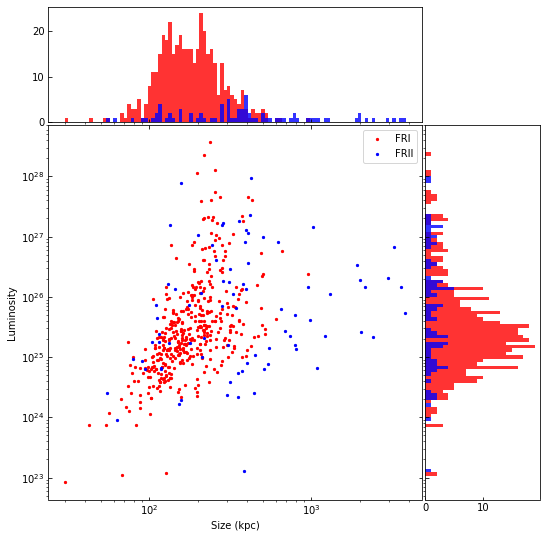

In [287]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)


# the scatter plots:
ax_scatter.scatter(FRI0.phys_size, FRI0.luminosity, color='red', s=5)
ax_scatter.scatter(FRII0.phys_size, FRII0.luminosity, color='blue', s=5)
ax_scatter.set_ylabel('Luminosity')
ax_scatter.set_xlabel('Size (kpc)')

ax_scatter.legend(['FRI' ,'FRII'])
ax_histx.hist(FRI0.phys_size, bins=np.logspace(np.log10(df.phys_size.min()),np.log10(df.phys_size.max()), 100), color='red', alpha=0.8)
ax_histy.hist(FRI0.luminosity, orientation='horizontal', bins=np.logspace(np.log10(df.luminosity.min()),np.log10(df.luminosity.max()), 100), color='red', alpha=0.8)
ax_histx.hist(FRII0.phys_size, bins=np.logspace(np.log10(df.phys_size.min()),np.log10(df.phys_size.max()), 100), color='blue', alpha=0.8)
ax_histy.hist(FRII0.luminosity, orientation='horizontal', bins=np.logspace(np.log10(df.luminosity.min()),np.log10(df.luminosity.max()), 100), color='blue', alpha=0.8)

#log scales
ax_scatter.set_yscale('log')
ax_scatter.set_xscale('log')
ax_histy.set_yscale('log')
ax_histx.set_xscale('log')


ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

In [234]:
for delta_z in [0, 0.1, 0.2, 0.3, 0.4]:
    print(delta_z, np.mean(FRI[FRI.dz==delta_z].phys_size))

0 192.8444257984194
0.1 185.0722923214779
0.2 178.45645429817907
0.3 171.40101299740346
0.4 164.36661931076858


In [235]:
for delta_z in [0, 0.1, 0.2, 0.3, 0.4]:
    print(delta_z, np.mean(FRII[FRII.dz==delta_z].phys_size))

0 622.5441419373147
0.1 616.621808140232
0.2 616.5019025698955
0.3 617.3035223513899
0.4 620.0870320451816


In [236]:
for delta_z in [0, 0.1, 0.2, 0.3, 0.4]:
    print(delta_z, np.mean(FRI[FRI.dz==delta_z].luminosity))

0 5.914790493977754e+26
0.1 5.811112368353592e+26
0.2 5.716127001044855e+26
0.3 5.633980075673369e+26
0.4 5.5541777232880634e+26


In [237]:
for delta_z in [0, 0.1, 0.2, 0.3, 0.4]:
    print(delta_z, np.mean(FRII[FRII.dz==delta_z].luminosity))

0 2.9702347379439533e+26
0.1 2.9157813036402187e+26
0.2 2.870851455220883e+26
0.3 2.823729737097567e+26
0.4 2.7842106101334198e+26


In [238]:
for dz in [0, 0.1, 0.2, 0.3]:
    print(np.mean(FRI[FRI.dz==0+dz].luminosity)/np.mean(FRI[FRI.dz==round(0.1+dz,1)].luminosity))
    print(np.mean(FRI[FRI.dz==0+dz].phys_size)/np.mean(FRI[FRI.dz==round(0.1+dz,1)].phys_size))
    print()

1.0178413561900432
1.0419951219031804

1.0166170848358294
1.0370725623195705

1.0145806204970769
1.041163358240377

1.0143679868310125
1.0427969725004498



In [239]:
for dz in [0, 0.1, 0.2, 0.3]:
    print(np.mean(FRII[FRII.dz==dz].luminosity)/np.mean(FRII[FRII.dz==round(0.1+dz,1)].luminosity))
    print(np.mean(FRII[FRII.dz==dz].phys_size)/np.mean(FRII[FRII.dz==round(0.1+dz,1)].phys_size))
    print()

1.0186754178839654
1.009604483200075

1.0156503563908286
1.0001944934311422

1.016687757863028
0.9987014171271194

1.0141940149284372
0.9955110983620944

